<a href="https://colab.research.google.com/github/JarvisSan22/pyxelate/blob/master/Pyxelate_20210405.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install git+https://github.com/sedthh/pyxelate.git

  Cloning https://github.com/sedthh/pyxelate.git to /tmp/pip-req-build-8t_qhujd
  Running command git clone -q https://github.com/sedthh/pyxelate.git /tmp/pip-req-build-8t_qhujd
  Created wheel for pyxelate: filename=pyxelate-1.2.1-cp37-none-any.whl size=10014 sha256=6eb97e4482a792f911c615d3238807eabaae23dc367fbfff221c0910a20bf47d
  Stored in directory: /tmp/pip-ephem-wheel-cache-eojoyr_0/wheels/56/1a/ad/4e2f88d344b53f7a5cfdba23aed917a1f24810555b9d211ba2
Successfully built pyxelate


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pyxelate import Pyxelate
from skimage import io
import matplotlib.pyplot as plt
import cv2
import glob 
import os
import numpy as np
%matplotlib inline

In [ ]:
#画像の解析
def RBGhist(img):
  h,w,c=img.shape
  #RBGのヒストグラム
  fig,axs=plt.subplots(2,1,figsize=(8,8))
  #monoのimgsを作成する
  RBG_imgs=[]
  colors=["blue","green","red"]
  for coli,col in zip(range(c),colors):
    #monoの画像
    img_c=np.zeros((h,w,c),dtype=np.uint8)
    img_c[:,:,coli]=img[:,:,coli]
    RBG_imgs.append(img_c)
    #色によりヒストグラム
    hist_c=cv2.calcHist([img],[coli],None,[256],[1,255])
    axs[1].plot(hist_c,color=col,label=col)

  RBG_monos=cv2.hconcat(RBG_imgs)
  axs[0].imshow(cv2.cvtColor(RBG_monos,cv2.COLOR_BGR2RGB))
  axs[0].set_axis_off()
  axs[1].legend()
  plt.show()

def grayhist(img):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gray_hist = cv2.calcHist([img_gray],[0],None,[256],[0,256])
  fig,axs=plt.subplots(2,1,figsize=(8,8))
  axs[0].imshow(img_gray,cmap="gray")
  axs[0].set_axis_off()
  axs[1].plot(img_gray_hist,color="gray")

#RBGhist(img)
#grayhist(img)


In [ ]:
#img = io.imread("/content/drive/MyDrive/Colab Notebooks/Photos/sakura_2.jpg")
# generate pixel art that is 1/14 the size

def Pixlize(img,factor = 8,colors = 6,dither =True,plot=True):
  height, width, _ = img.shape 
  p = Pyxelate(height // factor, width // factor, colors, dither)
  img_small = p.convert(img)  # convert an image with these settings
  if plot:
    _, axes = plt.subplots(1, 2, figsize=(16, 16))
    axes[0].imshow(img)
    axes[1].imshow(img_small)
    plt.show()
    for ax in axes:
      ax.axis("off")
  return img_small

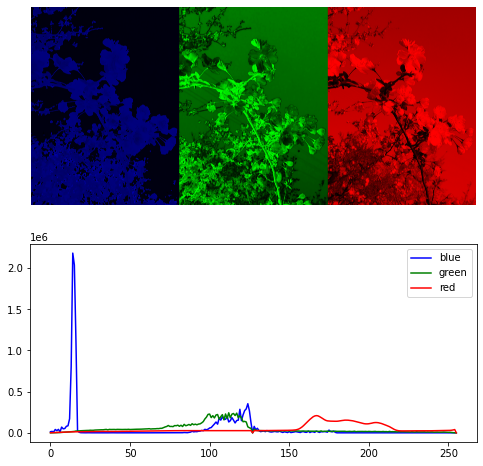

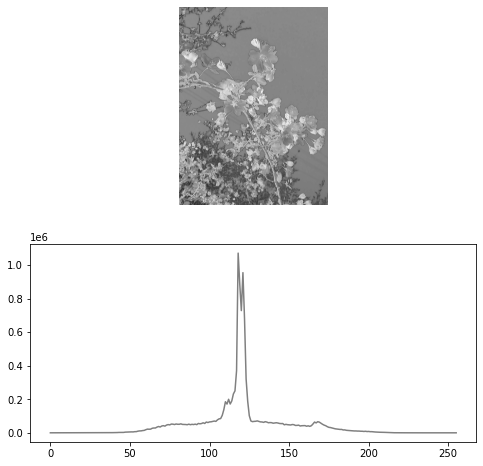

In [ ]:
#桜部分だけを抽出する
img = io.imread("/content/drive/MyDrive/Colab Notebooks/Photos/Sakura/sakura_5.jpg")
img_hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
RBGhist(img_hsv)
grayhist(img_hsv)

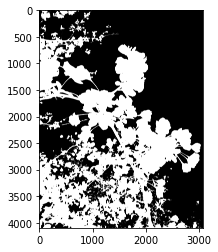

In [ ]:
#Binary
#gray=cv2.cvtColor(img[:,:,1:], cv2.COLOR_BGR2GRAY)
#thre_img=cv2.cvtColor(img_hsv, cv2.COLOR_BGR2GRAY)
thre_img=img_hsv[:,:,0]
thresh, binaryh = cv2.threshold (thre_img, 80, 230, cv2.THRESH_BINARY)

thresh, binaryg = cv2.threshold (cv2.cvtColor(img_hsv, cv2.COLOR_BGR2GRAY), 80, 250, cv2.THRESH_BINARY)
binary=cv2.bitwise_and(binaryh,binaryg)

plt.imshow(binary, cmap="gray")


In [ ]:
h,w,c=img.shape
binary_mask=np.zeros((h,w,3),dtype=np.uint8)
for i in range(3):
  binary_mask[:,:,i]=binary

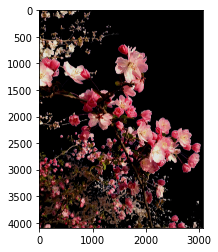

In [ ]:
img_col_mask = cv2.bitwise_and(img,binary_mask)
img_background=cv2.bitwise_and(img,~binary_mask)
plt.imshow(img_col_mask)



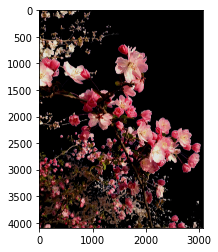

In [ ]:
plt.imshow(img_col_mask)



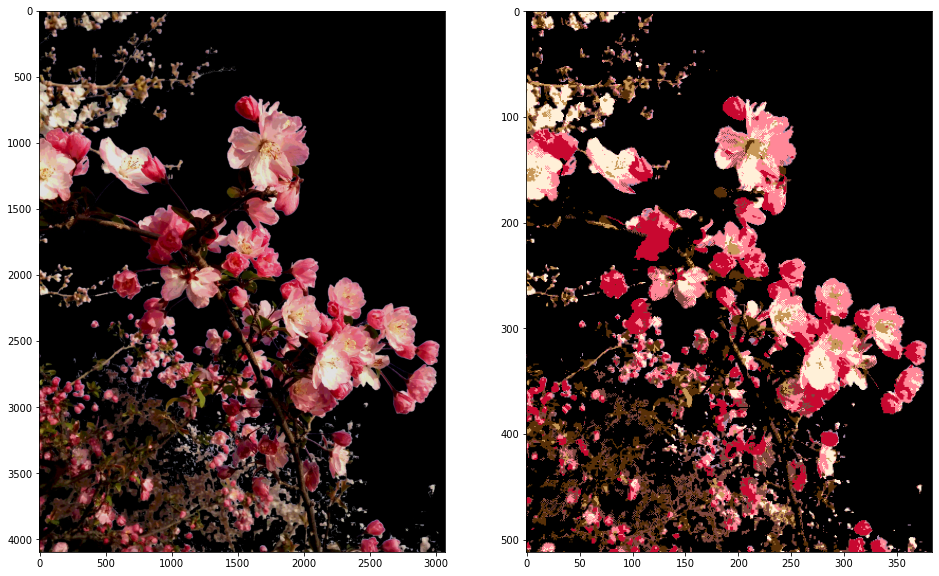

In [ ]:
 img_pixle=Pixlize(img_col_mask,colors = 8)

(4096, 3072, 3) (512, 384, 3)
(4096, 3072, 3) (4096, 3072, 3)


(-0.5, 3071.5, 4095.5, -0.5)

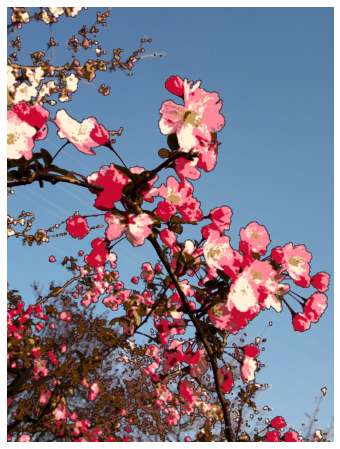

In [ ]:
print(img.shape,img_pixle.shape)
h,w,c=img.shape
img_new=img.copy()
img_pixle_re=cv2.resize(img_pixle,(w,h),200)
print(img.shape,img_pixle_re.shape)

_, mask = cv2.threshold(img_pixle_re, thresh=1, maxval=255, type=cv2.THRESH_BINARY_INV)
img_new[mask == 0] = 0
#plt.imshow(img_new)

img_combined=img_new+img_pixle_re
#img_combined=img_background+img_pixle_re
_, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(img_combined)
ax.axis("off")
#img[img_pixle_re[:,:,:]==[0,0,0]]=[0,0,0]
#mask
#RBGhist(img_pixle)
#grayhist(img_pixle)




In [ ]:
#関数
#Double Binary 
def Pizle_threshold(img,th_h=[80,230],th_g=[80,250],check_hsv=False,plot=True):
 # Convert to Hsv
  img_hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  if check_hsv:
    RBGhist(img_hsv)
    grayhist(img_hsv)

  #Cut buy H 
  thre_img=img_hsv[:,:,0]
  thresh, binaryh = cv2.threshold (thre_img, th_h[0], th_h[1], cv2.THRESH_BINARY)
  #Cut but brightness 
  thresh, binaryg = cv2.threshold (cv2.cvtColor(img_hsv, cv2.COLOR_BGR2GRAY), th_g[0], th_g[1], cv2.THRESH_BINARY)
  binary=cv2.bitwise_and(binaryh,binaryg)
  #Binary mask
  h,w,c=img.shape
  binary_mask=np.zeros((h,w,3),dtype=np.uint8)
  for i in range(3):
    binary_mask[:,:,i]=binary
  #img_mask
  img_col_mask = cv2.bitwise_and(img,binary_mask)
  #background mask used later on　背景のマスク　さいごの部分に使います
  img_background=cv2.bitwise_and(img,~binary_mask)
  #pixlizer
  print("Pixlizer start")
  img_pixle=Pixlize(img_col_mask, factor = 8,colors = 6,dither =True,plot=True)
  print("Pixlizered")
  #resize 
  print(img.shape,img_pixle.shape)
  h,w,c=img.shape
  img_pixle_re=cv2.resize(img_pixle,(w,h),200)
  print(img.shape,img_pixle.shape)
  #image combine 
  img_combined=img_background+img_pixle_re
  if plot:
    _, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(img_combined)
    ax.axis("off")
  return img_combined


In [ ]:
for i,file in enumerate(glob.glob("/content/drive/MyDrive/Colab Notebooks/Photos/Sakura/***")):
  base=os.path.basename(file)
  print(file)
  new_img=Pizle_threshold(img)
  io.imsave(file.replace("sakura","pixle_sakura"), new_img)
  print(file.replace("sakura","pixle_sakura"))

/content/drive/MyDrive/Colab Notebooks/Photos/Sakura/sakura_0.jpg
Pixlizer start
